In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [ ]:
# Load data
housing_df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train.csv')
df_adjusted = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')
# data description: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1460 non-null   int64  
 1   Unnamed: 0     1460 non-null   int64  
 2   Id             1460 non-null   int64  
 3   MSSubClass     1460 non-null   int64  
 4   MSZoning       1460 non-null   object 
 5   LotFrontage    1201 non-null   float64
 6   LotArea        1460 non-null   int64  
 7   Street         1460 non-null   object 
 8   Alley          91 non-null     object 
 9   LotShape       1460 non-null   object 
 10  LandContour    1460 non-null   object 
 11  Utilities      1460 non-null   object 
 12  LotConfig      1460 non-null   object 
 13  LandSlope      1460 non-null   object 
 14  Neighborhood   1460 non-null   object 
 15  Condition1     1460 non-null   object 
 16  Condition2     1460 non-null   object 
 17  BldgType       1460 non-null   object 
 18  HouseSty

In [ ]:
df_adjusted

,Unnamed: 0.1,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AdjSalePrice
0,0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,398750.982473
1,1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,401247.755503
2,2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,368453.793465
3,3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,307042.407728
4,4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,459555.010815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,307101.075328
1456,1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,382687.537712
1457,1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,399864.532624
1458,1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,236296.050474


In [ ]:
df_adjusted['AdjSalePrice'].max()

1201601.3762694856

In [ ]:
# Checking for missing values
missing_values = df_adjusted.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# Checking for duplicates
duplicates = df_adjusted.duplicated().sum()
display(f'Number of duplicate rows: {duplicates}')

# Checking data types
data_types = df_adjusted.dtypes
display(data_types)

'Number of duplicate rows: 0'

Unnamed: 0.1       int64
Unnamed: 0         int64
Id                 int64
MSSubClass         int64
MSZoning          object
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
AdjSalePrice     float64
Length: 84, dtype: object

In [ ]:
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1460 non-null   int64  
 1   Unnamed: 0     1460 non-null   int64  
 2   Id             1460 non-null   int64  
 3   MSSubClass     1460 non-null   int64  
 4   MSZoning       1460 non-null   object 
 5   LotFrontage    1201 non-null   float64
 6   LotArea        1460 non-null   int64  
 7   Street         1460 non-null   object 
 8   Alley          91 non-null     object 
 9   LotShape       1460 non-null   object 
 10  LandContour    1460 non-null   object 
 11  Utilities      1460 non-null   object 
 12  LotConfig      1460 non-null   object 
 13  LandSlope      1460 non-null   object 
 14  Neighborhood   1460 non-null   object 
 15  Condition1     1460 non-null   object 
 16  Condition2     1460 non-null   object 
 17  BldgType       1460 non-null   object 
 18  HouseSty

In [ ]:
# Filling numerical missing values with the median  or the mean
numerical_columns = df_adjusted.select_dtypes(include=['int64', 'float64']).columns
df_adjusted[numerical_columns] = df_adjusted[numerical_columns].fillna(df_adjusted[numerical_columns].median())

# Filling categorical missing values with the mode
categorical_columns = df_adjusted.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_adjusted[col] = df_adjusted[col].fillna(df_adjusted[col].mode()[0])

# Confirming no more missing values
missing_values_after = df_adjusted.isnull().sum()
display(missing_values_after)

Unnamed: 0.1     0
Unnamed: 0       0
Id               0
MSSubClass       0
MSZoning         0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
AdjSalePrice     0
Length: 84, dtype: int64

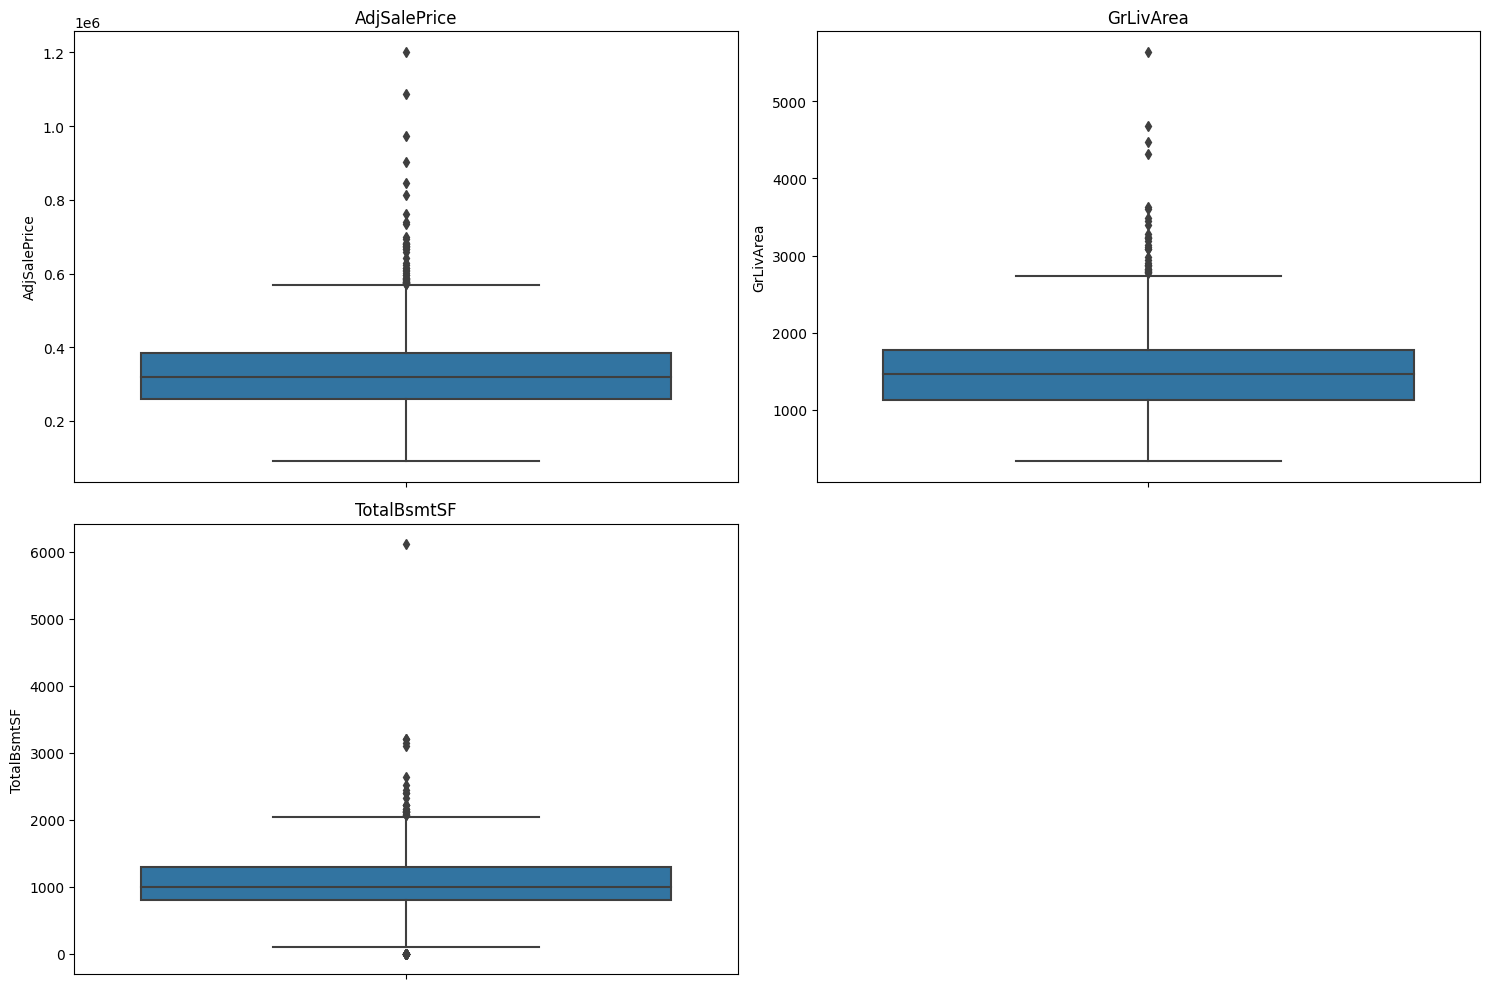

In [ ]:
# Selecting a few numerical columns for box plot visualization
selected_columns = ['AdjSalePrice', 'GrLivArea', 'TotalBsmtSF']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_adjusted[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np


# Capping outliers at the 95th percentile
for col in selected_columns:
    percentile_value = df_adjusted[col].quantile(0.95)
    df_adjusted[col] = np.where(df_adjusted[col] > percentile_value, percentile_value,
df_adjusted[col])

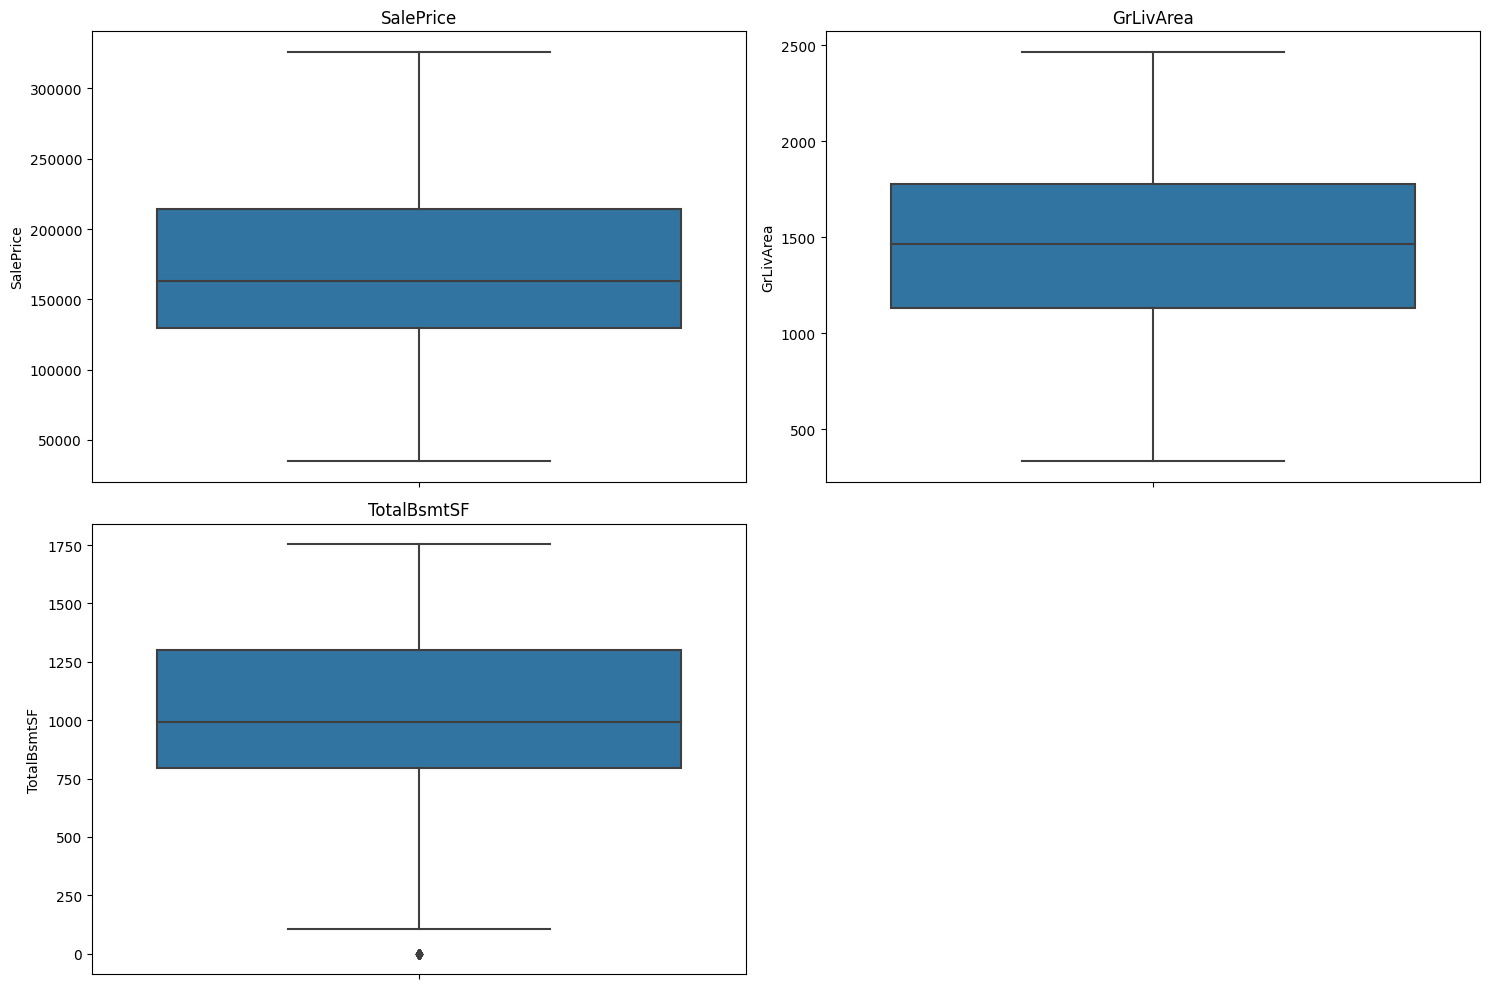

In [ ]:
# Checking to see the change in the outliers
selected_columns = ['SalePrice', 'GrLivArea', 'TotalBsmtSF']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_adjusted[col])
    plt.title(col)

plt.tight_layout()
plt.show()

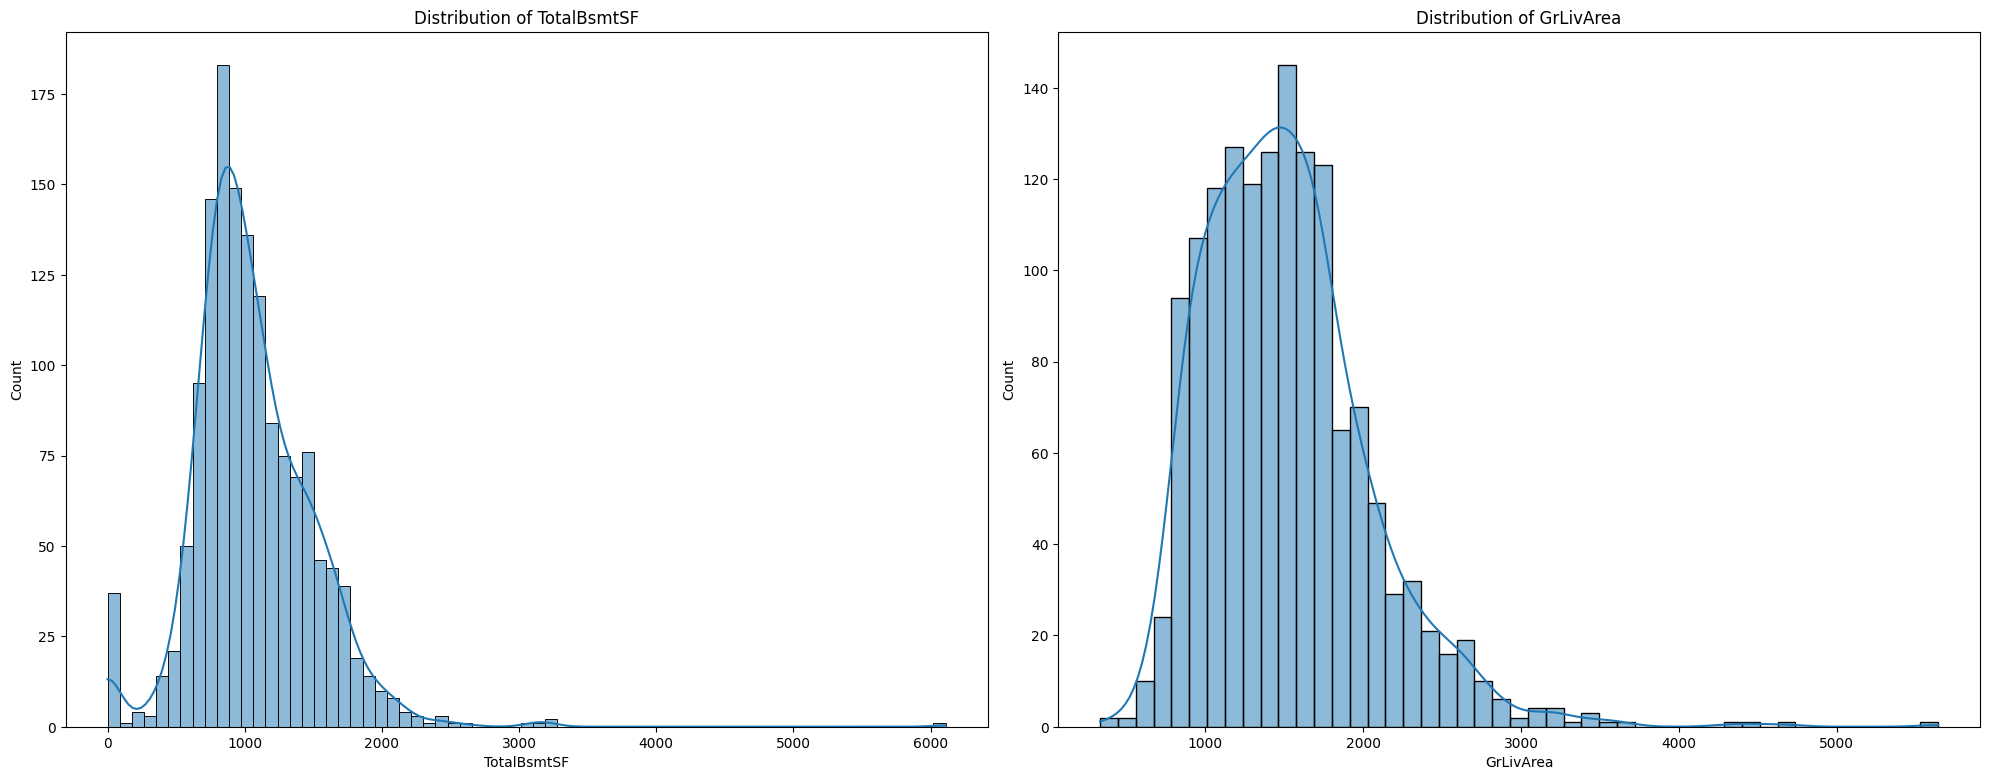

In [ ]:
#Analyzing Numerical Variables
numerical_vars = ['TotalBsmtSF', 'GrLivArea']

# Distribution of Numerical Variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_adjusted[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating Correlations Among 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'

# Correlation matrix
correlation_matrix = df_adjusted[['TotalBsmtSF', 'GrLivArea', 'AdjSalePrice']].corr()

# Displaying the correlation matrix
display(correlation_matrix)

,TotalBsmtSF,GrLivArea,AdjSalePrice
TotalBsmtSF,1.000000,0.454868,0.490566
GrLivArea,0.454868,1.000000,0.636818
AdjSalePrice,0.490566,0.636818,1.000000


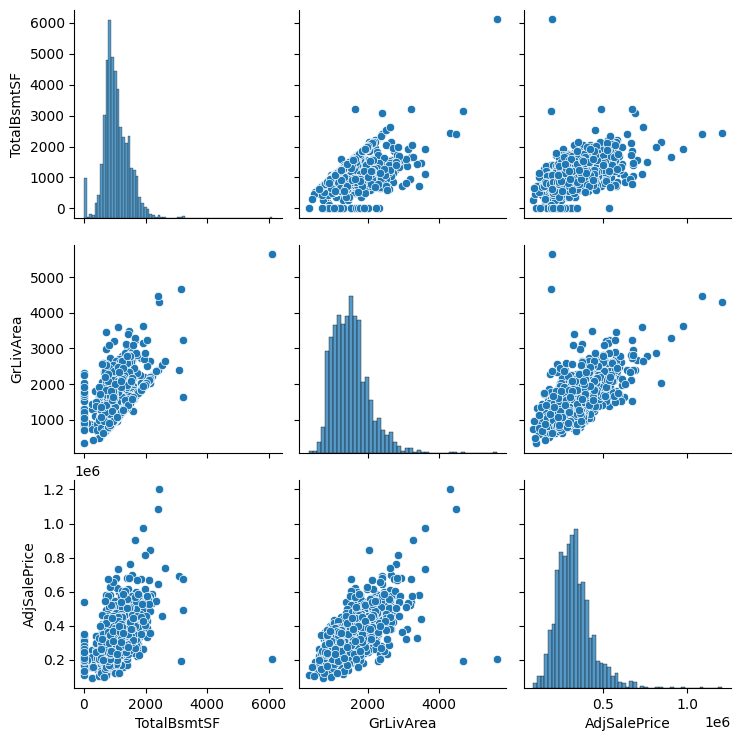

In [ ]:
# Pairplot for 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'
sns.pairplot(df_adjusted[['TotalBsmtSF', 'GrLivArea', 'AdjSalePrice']])
plt.show()

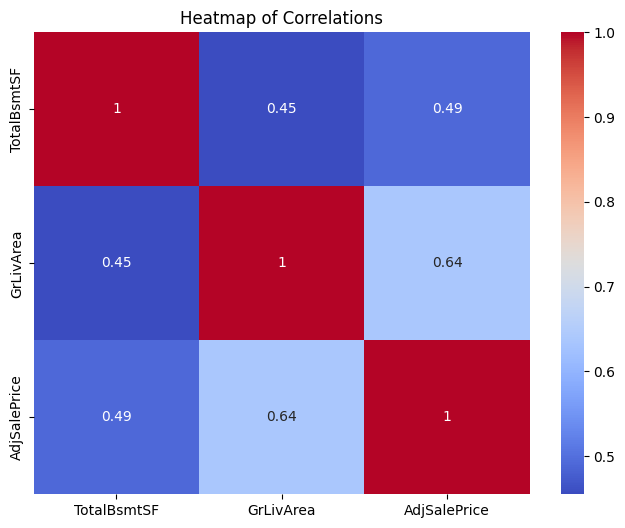

In [ ]:
# Creating a Heatmap for 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'

# Correlation matrix for the selected columns
corr = df_adjusted[['TotalBsmtSF', 'GrLivArea', 'AdjSalePrice']].corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', alpha =1)

# Setting plot title
plt.title('Heatmap of Correlations')

# Displaying the plot
plt.show()

## This heatmap provides a color-coded representation of the correlation coefficients, making it easier to understand the strength and direction of the relationships between these variables

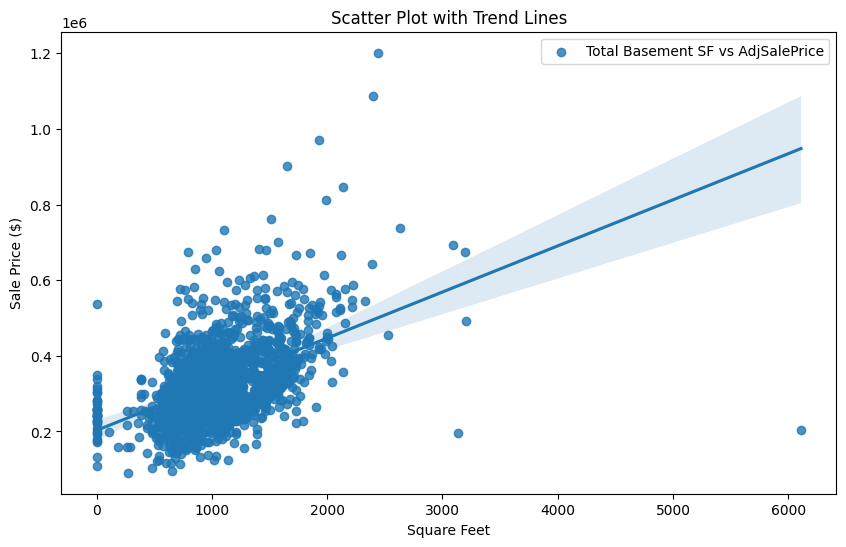

In [ ]:
# Scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalBsmtSF', y='AdjSalePrice', data=df_adjusted, label='Total Basement SF vs AdjSalePrice')


# Setting plot title and labels
plt.title('Scatter Plot with Trend Lines')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price ($)')
plt.legend()

# Displaying the plot
plt.show()

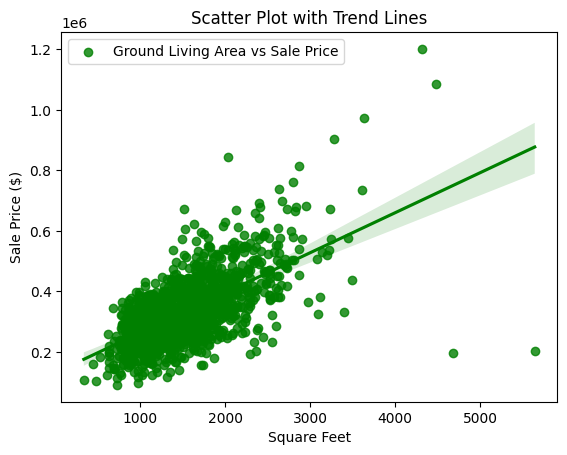

In [ ]:
sns.regplot(x='GrLivArea', y='AdjSalePrice', data=df_adjusted, label='Ground Living Area vs Sale Price', color='green')

# Setting plot title and labels
plt.title('Scatter Plot with Trend Lines')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price ($)')
plt.legend()

plt.show()

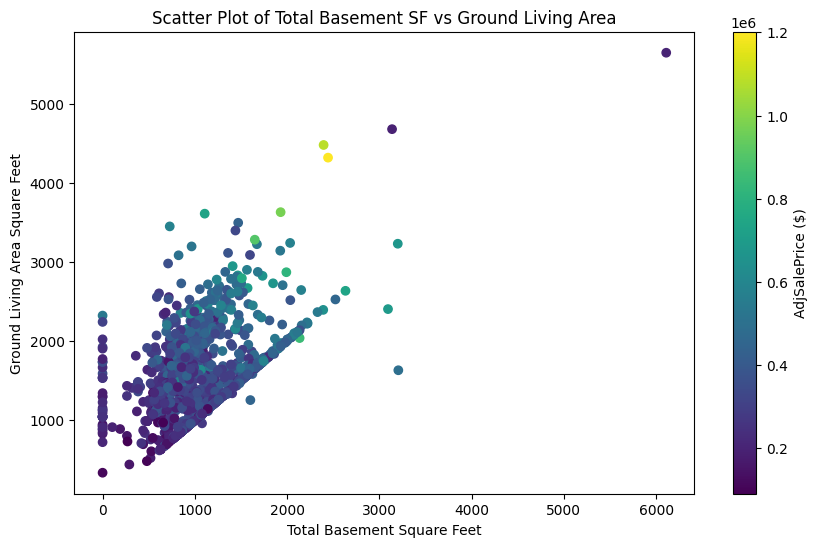

In [ ]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df_adjusted['TotalBsmtSF'], y=df_adjusted['GrLivArea'], c=df_adjusted['AdjSalePrice'], cmap='viridis', alpha = 1)

# Adding a color bar
plt.colorbar(scatter, label='AdjSalePrice ($)')

# Setting plot title and labels
plt.title('Scatter Plot of Total Basement SF vs Ground Living Area')
plt.xlabel('Total Basement Square Feet')
plt.ylabel('Ground Living Area Square Feet')

# Displaying the plot
plt.show()

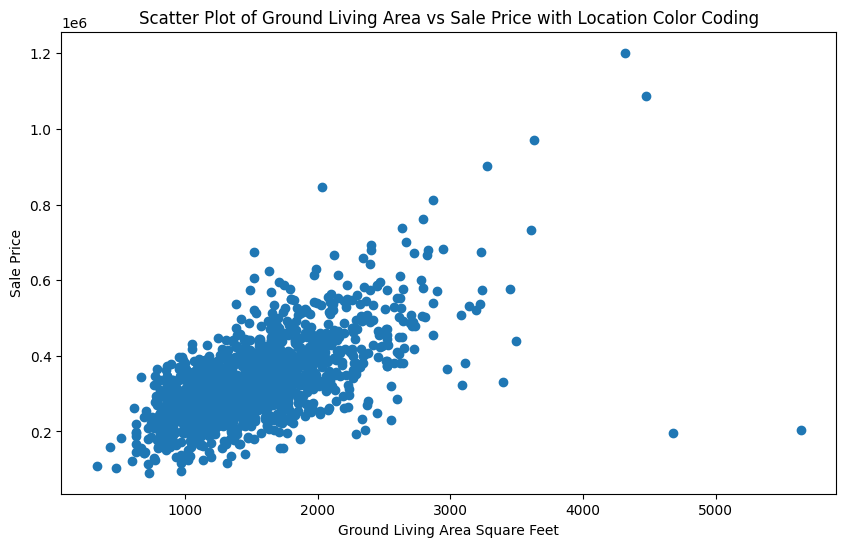

In [ ]:
# Creating the scatter plot for 'GrLivArea' and 'SalePrice' with 'Location' as color
plt.figure(figsize=(10, 6))
# Assuming 'Location' is a categorical variable that needs to be encoded
# Using a simple label encoding for demonstration
if 'Location' in df_adjusted.columns:
    df_adjusted['Location_encoded'] = df_adjusted['Location'].astype('category').cat.codes
    scatter = plt.scatter(x=df_adjusted['GrLivArea'], y=df_adjusted['AdjSalePrice'], c=df_adjusted['Location_encoded'], cmap='viridis')
    plt.colorbar(scatter, label='Location')
else:
    plt.scatter(x=df_adjusted['GrLivArea'], y=df_adjusted['AdjSalePrice'])
    plt.title('Location data not available')

plt.title('Scatter Plot of Ground Living Area vs Sale Price with Location Color Coding')
plt.xlabel('Ground Living Area Square Feet')
plt.ylabel('Sale Price')
plt.show()

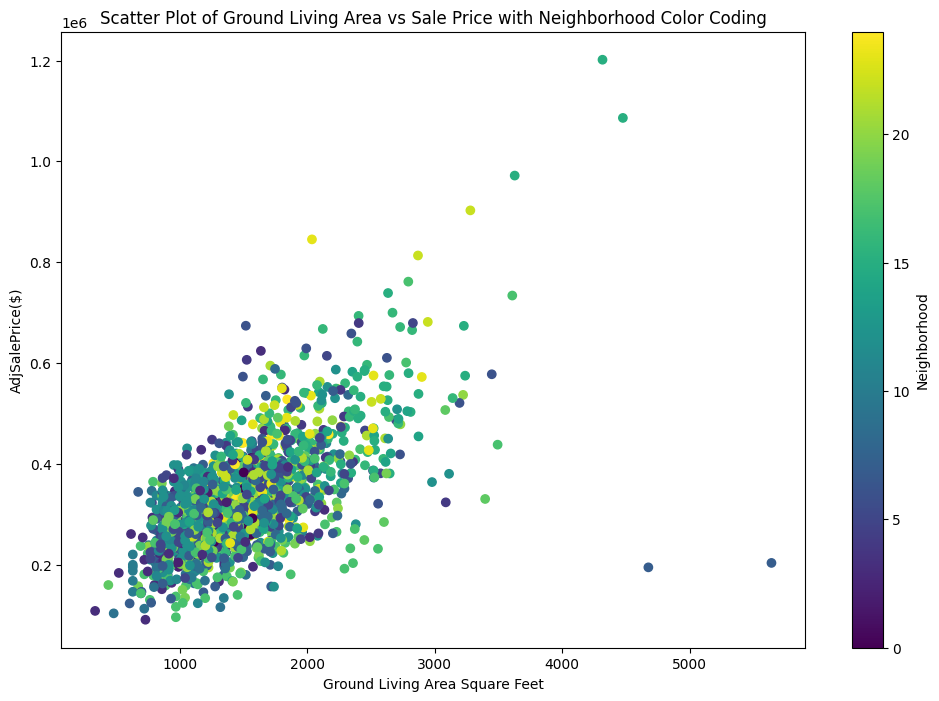

In [ ]:
# Creating a scatter plot for 'GrLivArea' and 'SalePrice' with 'Neighborhood' as color
plt.figure(figsize=(12, 8))
# Encoding 'Neighborhood' as a categorical variable for color coding
if 'Neighborhood' in df_adjusted.columns:
    df_adjusted['Neighborhood_encoded'] = df_adjusted['Neighborhood'].astype('category').cat.codes
    scatter = plt.scatter(x=df_adjusted['GrLivArea'], y=df_adjusted['AdjSalePrice'], c=df_adjusted['Neighborhood_encoded'], cmap='viridis')
    plt.colorbar(scatter, label='Neighborhood')
else:
    plt.scatter(x=df_adjusted['GrLivArea'], y=df_adjusted['AdjSalePrice'])
    plt.title('Neighborhood data not available')

plt.title('Scatter Plot of Ground Living Area vs Sale Price with Neighborhood Color Coding')
plt.xlabel('Ground Living Area Square Feet')
plt.ylabel('AdjSalePrice($)')
plt.show()